## Nonlinear programming using Frank-wolfe method

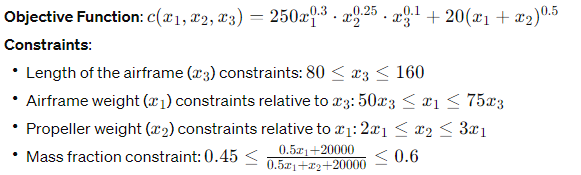

In [18]:
import numpy as np

# Objective function
def objective(x):
    x1, x2, x3 = x
    return 250 * x1**0.3 * x2**0.25 * x3**0.1 + 20 * (x1 + x2)**0.5

def gradient(x):
    x1, x2, x3 = x
    grad_x1 = 75 * x1**-0.7 * x2**0.25 * x3**0.1 + 10 / (x1 + x2)**0.5
    grad_x2 = 62.5 * x1**0.3 * x2**-0.75 * x3**0.1 + 10 / (x1 + x2)**0.5
    grad_x3 = 25 * x1**0.3 * x2**0.25 * x3**-0.9 
    return np.array([grad_x1, grad_x2, grad_x3])

from scipy.optimize import linprog

def solve_linear_problem(grad):

    A = [
        [1, 0, -75],  
        [-1, 0, 50],
        [-3, 1, 0],  
        [2, -1, 0],   
        [-0.275, 0.45, 0],  
        [0.275, -0.825, 0] 
    ]

    b = [0, 0, 0, 0, 11000, -11000]

    
    c = grad

    bounds = [(0, None), (0, None), (80, 160)]

    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

    if res.success:
        return res.x
    else:
        raise ValueError("Linear programming failed to find a solution.")


# Constraint check function
def check_all_constraints(x):
    x1, x2, x3 = x
    return (50*x3 <= x1 <= 75*x3) and (2*x1 <= x2 <= 3*x1) and (0.45*x2 <= 0.275*x1 + 11000 <= 0.825*x2)

def gss(f, a, b, tol=1e-5):
    """Golden-section search
    to find the minimum of f on [a,b]
    """
    phi = (1 + 5**0.5) / 2 
    while abs(b - a) > tol:
        c = b - (b - a) / phi
        d = a + (b - a) / phi
        if f(c) < f(d):  # f(c) > f(d) to find the maximum
            b = d
        else:
            a = c

    return (b + a) / 2


def frank_wolfe2(x0, max_iter=10, tol=1e-6):
    x = np.array(x0, dtype=float)  
    for k in range(max_iter):
        grad = gradient(x) 
        

        s = solve_linear_problem(grad)  
        
        def line_search_objective(alpha):
            return objective(x + alpha * (s - x))
        
        alpha = gss(line_search_objective, 0, 1, tol=tol)
        #print(alpha)
        x_new = x + alpha * (s - x)
        #print(s,s-x)
        if np.linalg.norm(x_new - x, ord=2) < tol or abs(objective(x_new) - objective(x)) < tol:
            break
        
        x = x_new 

    return x, objective(x)

In [19]:
initial = [6000, 15400, 120]

In [20]:
check_all_constraints(initial)

True

In [21]:
frank_wolfe2(initial)

(array([ 5000., 15000.,    80.]), 58031.445350634116)

In [22]:
g = gradient(initial)

In [23]:
g

array([ 3.12436101,  1.06056717, 50.93337356])

In [24]:
frank_wolfe2([5900,15300,80])

(array([ 5000., 15000.,    80.]), 58031.44535063351)

In [25]:
check_all_constraints([5900,15300,80])

True